In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
di = np.random.uniform(0,5, 20)

In [3]:
def signal_model(x, a, b):
    return a*np.exp(b*x)

In [4]:
def c0_k(mu, x, k):
    return (((((k*x)-mu)**k)*np.exp(-k*x))/(np.math.factorial(k)))*(1+(k/(mu-(k*x))))

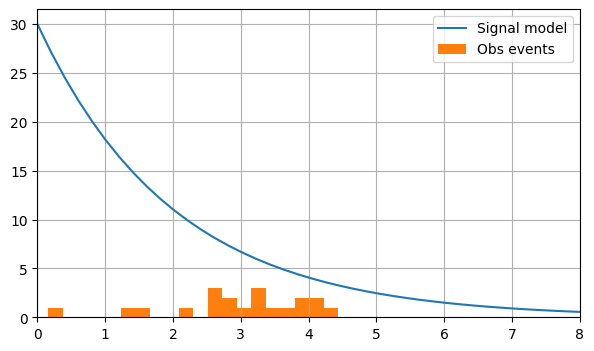

In [5]:
c1, c2 = 30, -0.5

plt.figure(figsize=(7,4))
x = np.linspace(0, 20, 100)
plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
histvalue, xbins, _ = plt.hist(di, bins = 20, label = 'Obs events')
binscenter=(xbins[:-1]+xbins[1:])*0.5
plt.xlim(0,8); plt.legend(); plt.grid()
plt.show()

## Maximum gap method

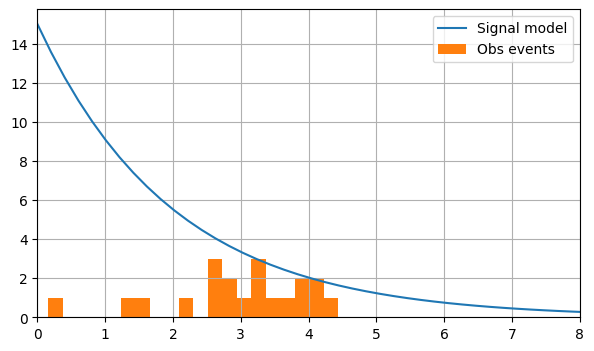

maximum area  8.772132777603048 is between 0.37637962662596974 and 1.2308148766433822


In [6]:
c1, c2 = 15, -0.5
plt.figure(figsize=(7,4))
x = np.linspace(0, 20, 100)
plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
histvalue, xbins, _ = plt.hist(di, bins = 20, label = 'Obs events')
binscenter=(xbins[:-1]+xbins[1:])*0.5
plt.xlim(0,8); plt.legend(); plt.grid()
plt.show()

i, maxgaps = 0, []
for b in range(20):
    if i < 20 and histvalue[i] ==0:
        for n in range(5):
            if histvalue[i+n] !=0: 
                gaparea = np.trapz([signal_model(xbins[i], c1, c2 ), signal_model(xbins[i+n], c1, c2 )], [xbins[i], xbins[i+n]])
                maxgaps.append((i, i+n , gaparea))
                i+=n; 
                break
    else:
        i+=1
maxgaps.append((xbins[-1], 8, np.trapz([signal_model(xbins[-1], c1, c2 ), signal_model(8, c1, c2 )], [xbins[-1], 8])))
maxarray = np.asarray(maxgaps)
maxvalues = maxarray[:][np.argmax(maxarray[:,2])]
print('maximum area ', maxvalues[2], 'is between', xbins[int(maxvalues[0])], 'and', xbins[int(maxvalues[1])])

In [7]:
mu = 0
for b in range(20):
    mu+=np.trapz([signal_model(xbins[b], c1, c2 ), signal_model(xbins[b+1],c1, c2 )], [xbins[b], xbins[b+1]])
print('mu is', mu)
print('m is ', mu/maxvalues[2])
print('x is', maxvalues[2])
c0 = 0
for k in range(0, int(mu/maxvalues[2])+1):
    c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
print('C0', c0)

mu is 24.411813995172075
m is  2.7828824088823825
x is 8.772132777603048
C0 0.9974217029682951


### Finding optimum signal model / sigma and $C_0$ using maximum gap method

In [8]:
def find_bin_width(n, b, histvalue):
	startbin = b
	i = histvalue[b]
	




maxgaps = []
for b in range(20):
    if b < len(histvalue) and histvalue[b] ==n:
        print('#events = '+ str(n)+' at bin#: ', b, ', xvalue[bin]: ',xbins[b], ', histvalue[i]: ',histvalue[b])
        if  b !=0:
            for m in np.arange(1,10):
                if histvalue[b-m] ==0:
                    continue
                else: 
                    startbin = b-m+1
                    startx = xbins[startbin]
                    break
        else: 
            startbin = b
            start = xbins[b]

#events = 1 at bin#:  0 , xvalue[bin]:  0.16277081412161665 , histvalue[i]:  1.0
#events = 1 at bin#:  5 , xvalue[bin]:  1.2308148766433822 , histvalue[i]:  1.0
#events = 1 at bin#:  6 , xvalue[bin]:  1.4444236891477351 , histvalue[i]:  1.0
#events = 1 at bin#:  9 , xvalue[bin]:  2.0852501266607946 , histvalue[i]:  1.0
#events = 1 at bin#:  13 , xvalue[bin]:  2.9396853766782067 , histvalue[i]:  1.0
#events = 1 at bin#:  15 , xvalue[bin]:  3.3669030016869135 , histvalue[i]:  1.0
#events = 1 at bin#:  16 , xvalue[bin]:  3.580511814191266 , histvalue[i]:  1.0
#events = 1 at bin#:  19 , xvalue[bin]:  4.221338251704325 , histvalue[i]:  1.0


For constant c1 7.105263157894737  c2  -0.5
C0 is 0.8702400738636663
expected events / area under blue curve:  11.563490839818353


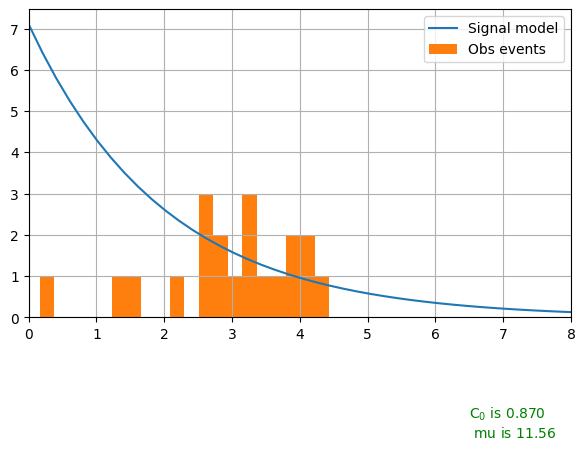

-------------------------------------
For constant c1 8.631578947368421  c2  -0.9736842105263159
C0 is 0.8774835282006176
expected events / area under blue curve:  7.47429322043329


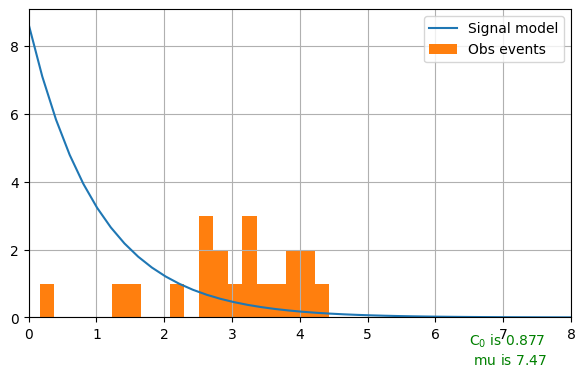

-------------------------------------
For constant c1 8.631578947368421  c2  -0.7368421052631584
C0 is 0.9082757214507786
expected events / area under blue curve:  9.964647232536644


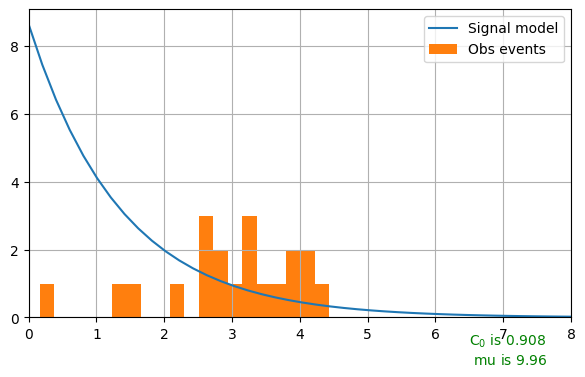

-------------------------------------
For constant c1 8.631578947368421  c2  -0.5
C0 is 0.9362543320471112
expected events / area under blue curve:  14.047499983186743


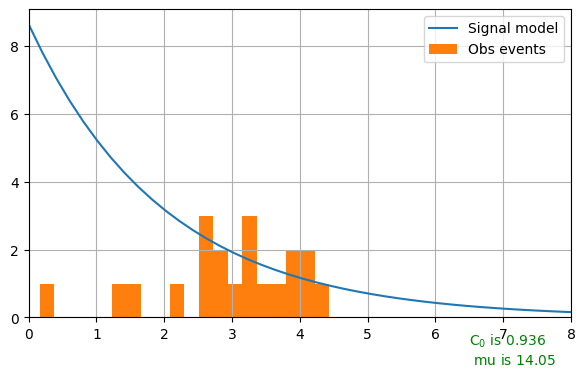

-------------------------------------
For constant c1 10.157894736842106  c2  -1.4473684210526319
C0 is 0.8705818246332644
expected events / area under blue curve:  5.5776679840239405


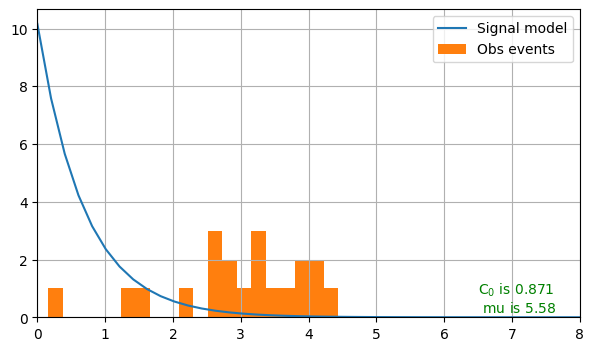

-------------------------------------
For constant c1 10.157894736842106  c2  -1.210526315789474
C0 is 0.9001580327136474
expected events / area under blue curve:  6.889621614269945


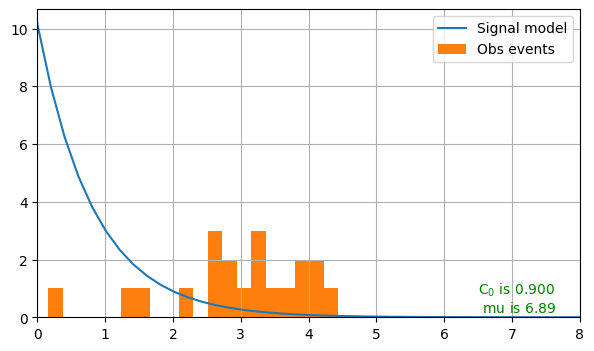

-------------------------------------
For constant c1 10.157894736842106  c2  -0.9736842105263159
C0 is 0.9269640816428628
expected events / area under blue curve:  8.795967021607474


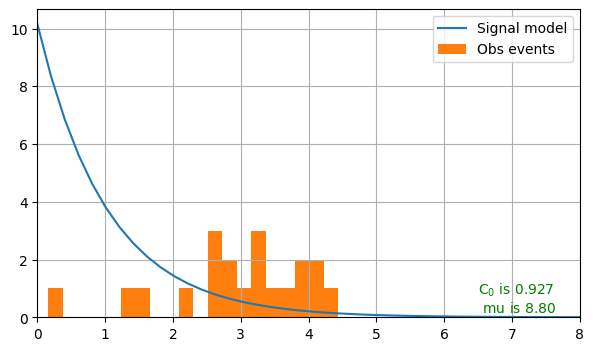

-------------------------------------
For constant c1 11.68421052631579  c2  -1.9210526315789473
C0 is 0.8547026373371642
expected events / area under blue curve:  4.510000917490553


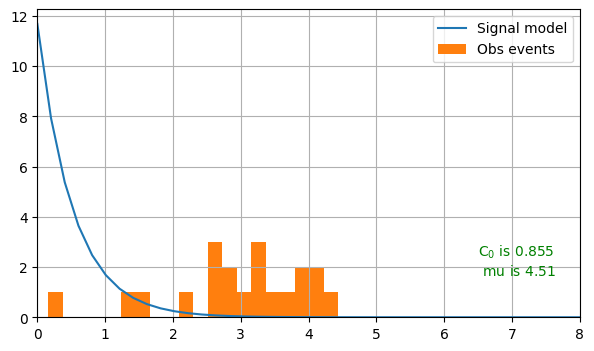

-------------------------------------
For constant c1 11.68421052631579  c2  -1.6842105263157898
C0 is 0.884774629918174
expected events / area under blue curve:  5.326827113415377


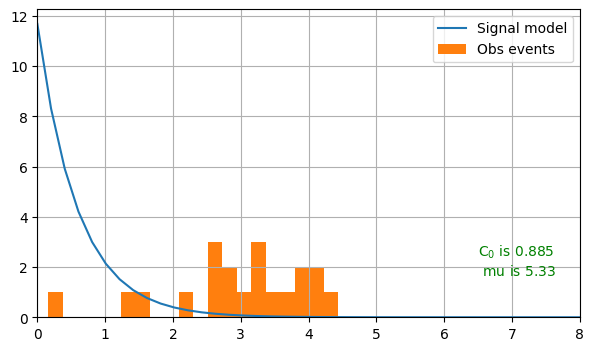

-------------------------------------
For constant c1 11.68421052631579  c2  -1.4473684210526319
C0 is 0.9122032459573496
expected events / area under blue curve:  6.415763173333236


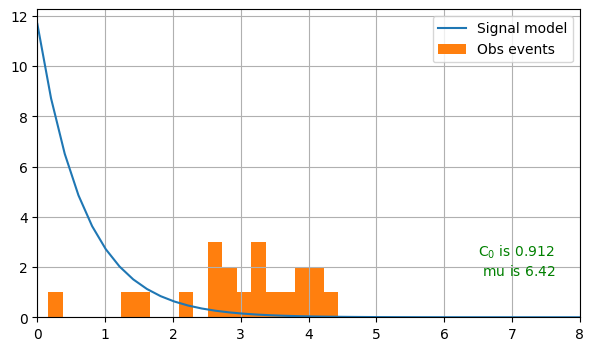

-------------------------------------
For constant c1 11.68421052631579  c2  -1.210526315789474
C0 is 0.9364864365999426
expected events / area under blue curve:  7.92484973247631


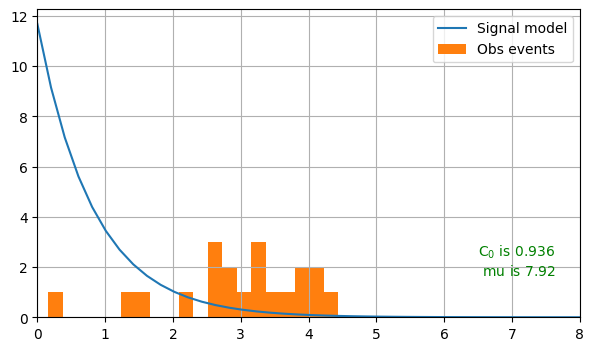

-------------------------------------
For constant c1 13.210526315789474  c2  -2.1578947368421053
C0 is 0.863604094954863
expected events / area under blue curve:  4.384296136944089


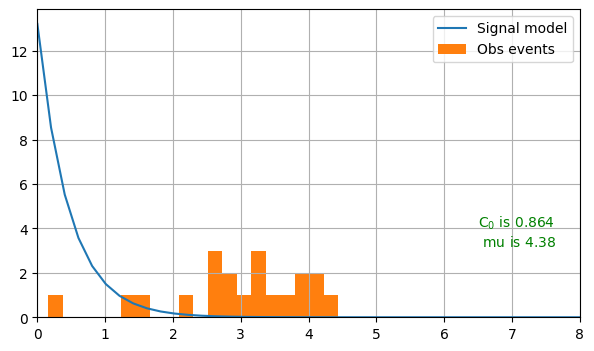

-------------------------------------
For constant c1 13.210526315789474  c2  -1.9210526315789473
C0 is 0.8923694261592992
expected events / area under blue curve:  5.099145181487067


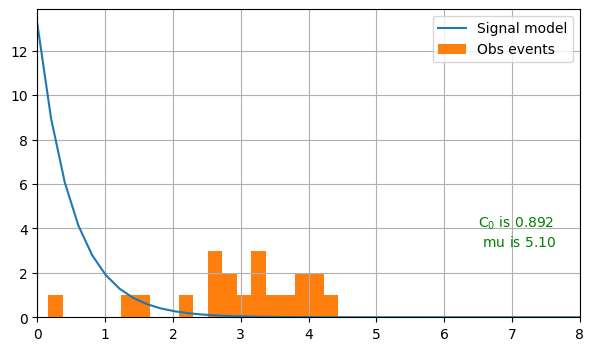

-------------------------------------
For constant c1 13.210526315789474  c2  -1.6842105263157898
C0 is 0.9182976496360917
expected events / area under blue curve:  6.0226738985011705


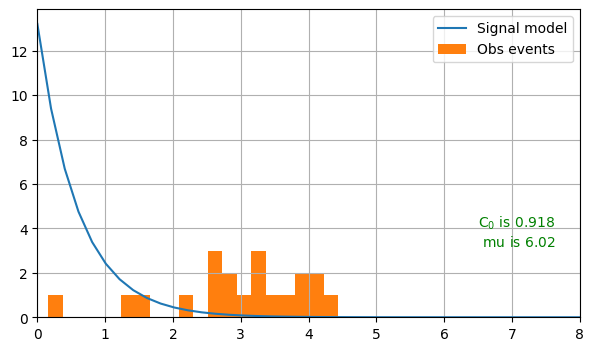

-------------------------------------
For constant c1 13.210526315789474  c2  -1.4473684210526319
C0 is 0.9409781018223566
expected events / area under blue curve:  7.253858362642532


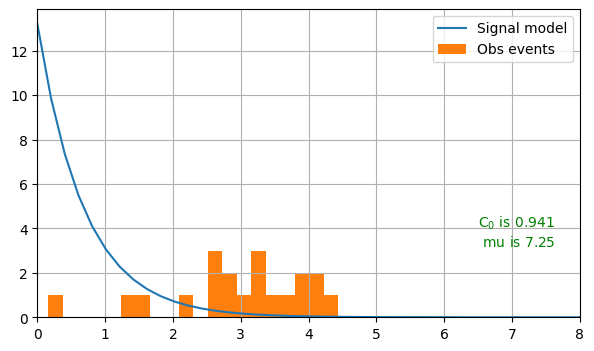

-------------------------------------
For constant c1 14.73684210526316  c2  -2.3947368421052633
C0 is 0.8677841596880357
expected events / area under blue curve:  4.257690829861281


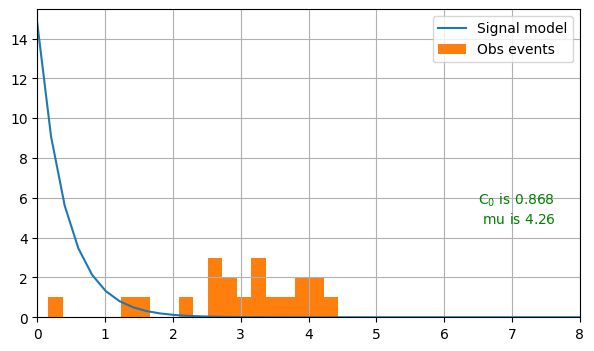

-------------------------------------
For constant c1 14.73684210526316  c2  -2.1578947368421053
C0 is 0.8957233866671815
expected events / area under blue curve:  4.890848280256355


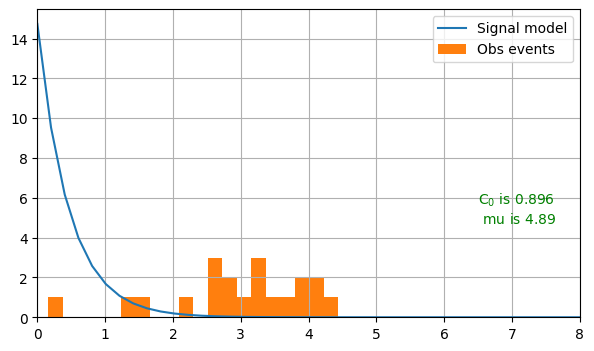

-------------------------------------
For constant c1 14.73684210526316  c2  -1.9210526315789473
C0 is 0.9207165115209196
expected events / area under blue curve:  5.688289445483581


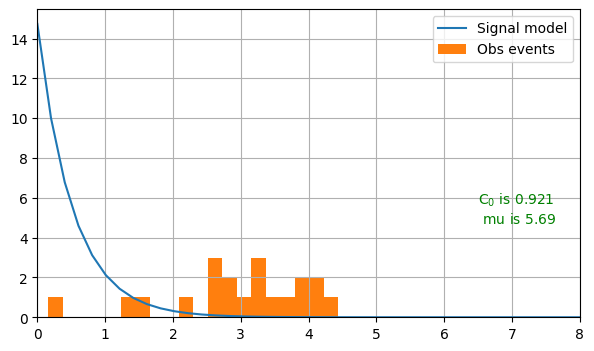

-------------------------------------
For constant c1 14.73684210526316  c2  -1.6842105263157898
C0 is 0.9424451554267385
expected events / area under blue curve:  6.718520683586959


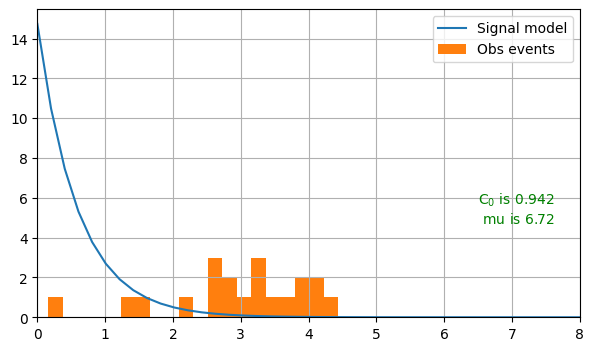

-------------------------------------
For constant c1 16.263157894736842  c2  -2.6315789473684212
C0 is 0.8685245290532236
expected events / area under blue curve:  4.132235057145459


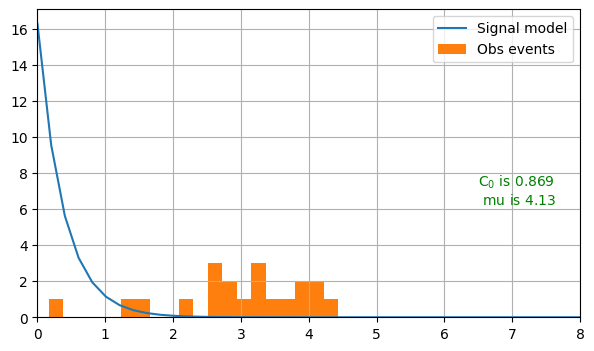

-------------------------------------
For constant c1 16.263157894736842  c2  -2.3947368421052633
C0 is 0.8960795046671217
expected events / area under blue curve:  4.698665951525484


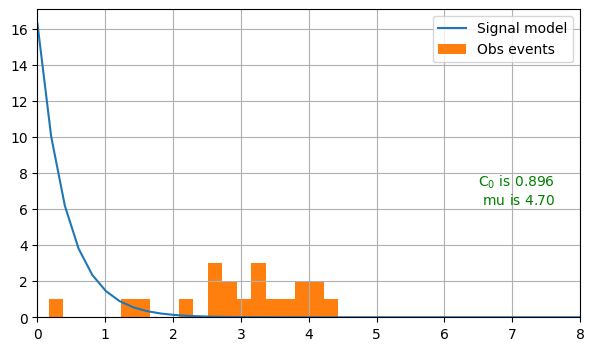

-------------------------------------
For constant c1 16.263157894736842  c2  -2.1578947368421053
C0 is 0.9206111912092152
expected events / area under blue curve:  5.397400423568618


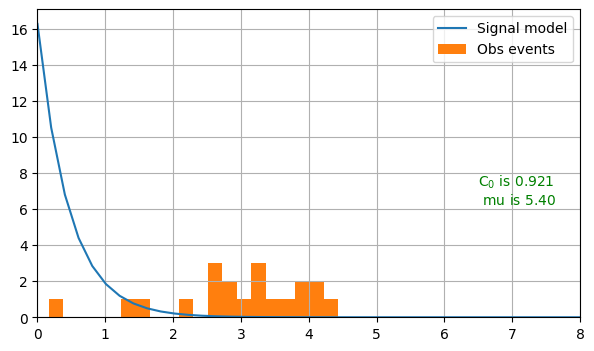

-------------------------------------
For constant c1 16.263157894736842  c2  -1.9210526315789473
C0 is 0.9418799437972905
expected events / area under blue curve:  6.277433709480094


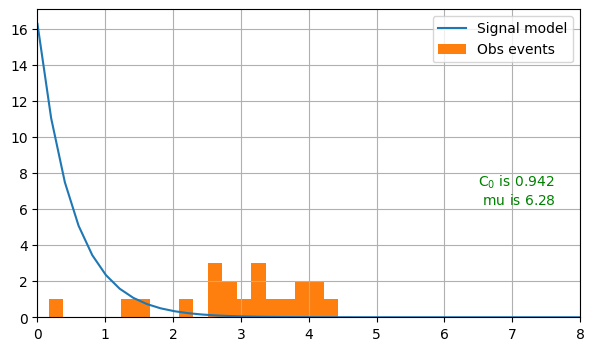

-------------------------------------
For constant c1 17.789473684210527  c2  -2.868421052631579
C0 is 0.8665443794826989
expected events / area under blue curve:  4.009085308531765


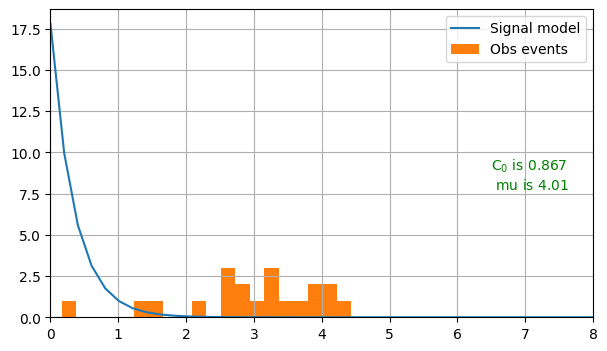

-------------------------------------
For constant c1 17.789473684210527  c2  -2.6315789473684212
C0 is 0.8941085515268146
expected events / area under blue curve:  4.5200499977837065


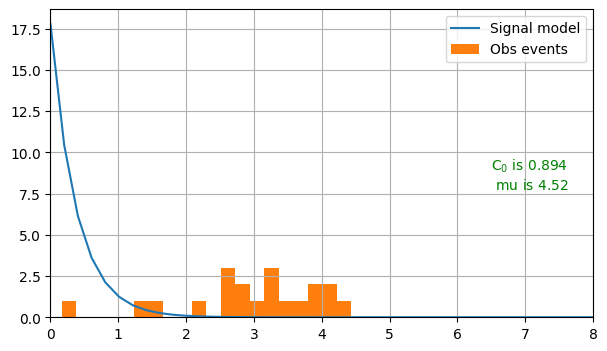

-------------------------------------
For constant c1 17.789473684210527  c2  -2.3947368421052633
C0 is 0.9185801943967283
expected events / area under blue curve:  5.139641073189688


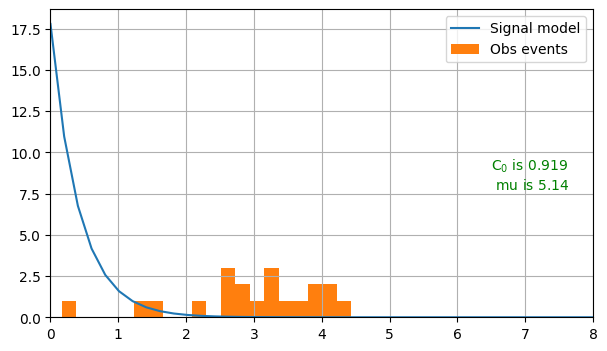

-------------------------------------
For constant c1 17.789473684210527  c2  -2.1578947368421053
C0 is 0.9397812069969589
expected events / area under blue curve:  5.903952566880885


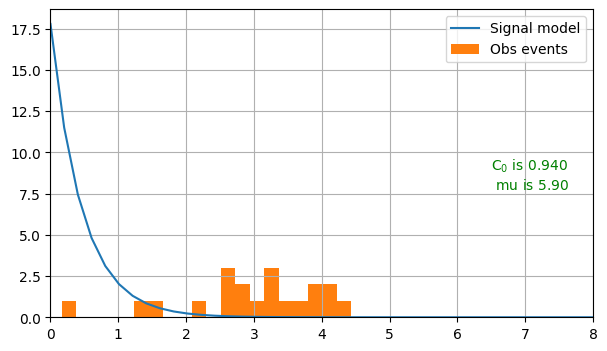

-------------------------------------
For constant c1 19.315789473684212  c2  -3.105263157894737
C0 is 0.8622438482649808
expected events / area under blue curve:  3.8889094331031098


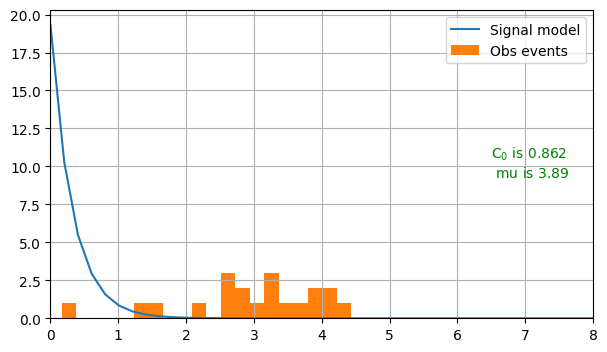

-------------------------------------
For constant c1 19.315789473684212  c2  -2.868421052631579
C0 is 0.890167205909348
expected events / area under blue curve:  4.3530600835241335


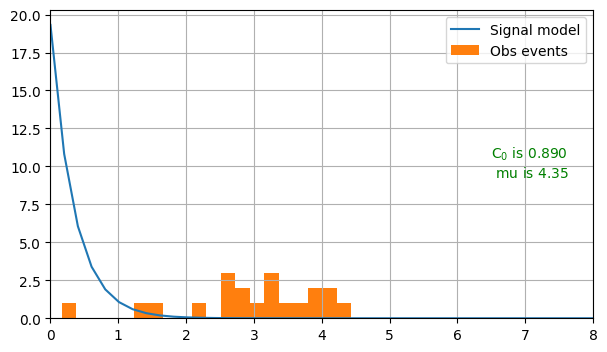

-------------------------------------
For constant c1 19.315789473684212  c2  -2.6315789473684212
C0 is 0.9149277053094497
expected events / area under blue curve:  4.907864938421951


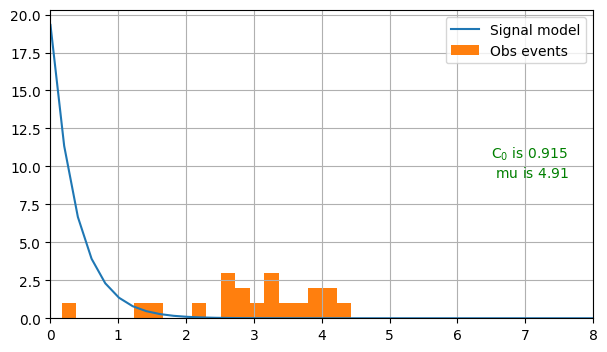

-------------------------------------
For constant c1 19.315789473684212  c2  -2.3947368421052633
C0 is 0.9363915452096043
expected events / area under blue curve:  5.580616194853894


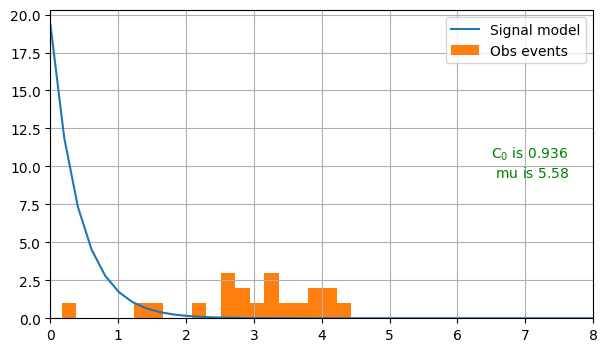

-------------------------------------
For constant c1 20.842105263157897  c2  -3.3421052631578947
C0 is 0.8558333477437513
expected events / area under blue curve:  3.772088448830736


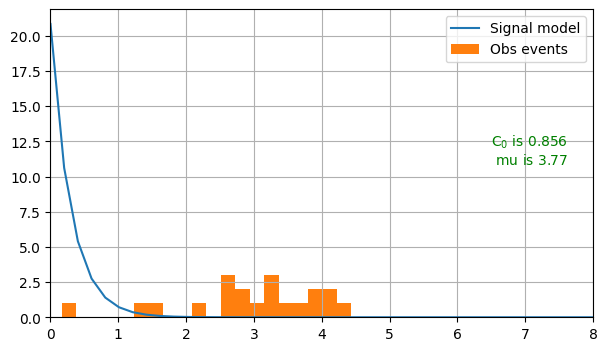

-------------------------------------
For constant c1 20.842105263157897  c2  -3.105263157894737
C0 is 0.8844294450675191
expected events / area under blue curve:  4.196207453702538


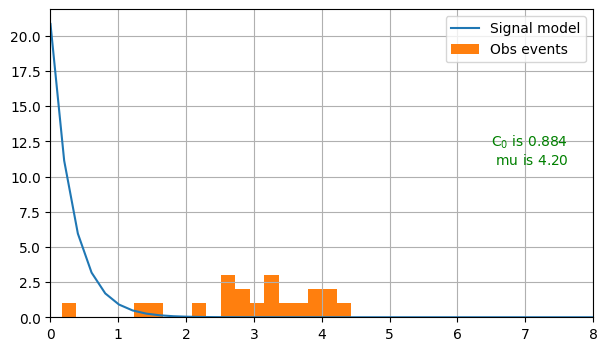

-------------------------------------
For constant c1 20.842105263157897  c2  -2.868421052631579
C0 is 0.9097898468288426
expected events / area under blue curve:  4.697034858516506


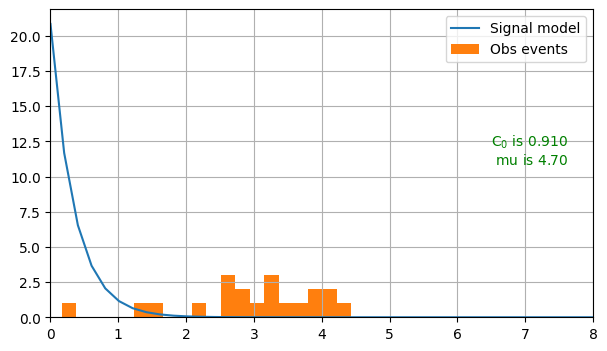

-------------------------------------
For constant c1 20.842105263157897  c2  -2.6315789473684212
C0 is 0.9318088619580496
expected events / area under blue curve:  5.295679879060196


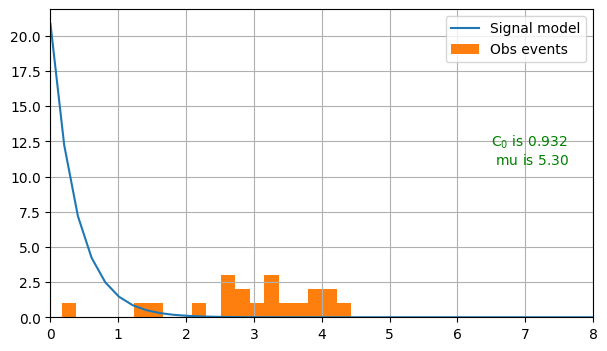

-------------------------------------
For constant c1 22.36842105263158  c2  -3.3421052631578947
C0 is 0.8769577213029439
expected events / area under blue curve:  4.04832724937642


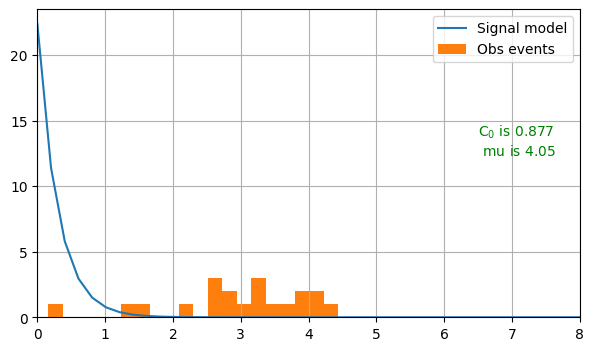

-------------------------------------
For constant c1 22.36842105263158  c2  -3.105263157894737
C0 is 0.9032007541965804
expected events / area under blue curve:  4.503505474301966


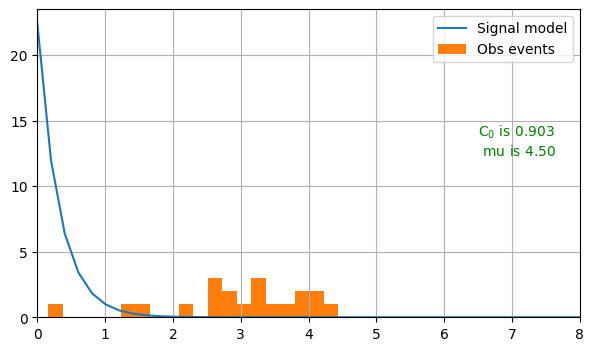

-------------------------------------
For constant c1 22.36842105263158  c2  -2.868421052631579
C0 is 0.9260428391725001
expected events / area under blue curve:  5.041009633508875


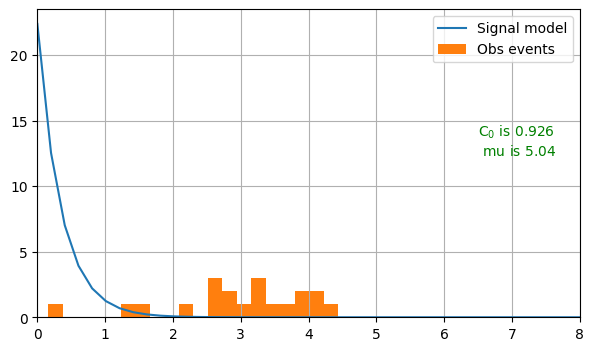

-------------------------------------
For constant c1 22.36842105263158  c2  -2.6315789473684212
C0 is 0.9454533419975814
expected events / area under blue curve:  5.683494819698444


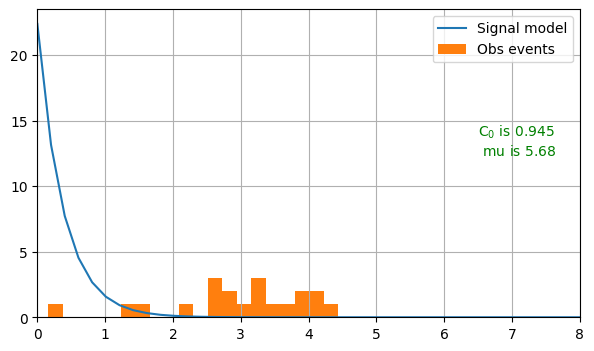

-------------------------------------
For constant c1 23.894736842105264  c2  -3.5789473684210527
C0 is 0.8677440057712531
expected events / area under blue curve:  3.9084866304906165


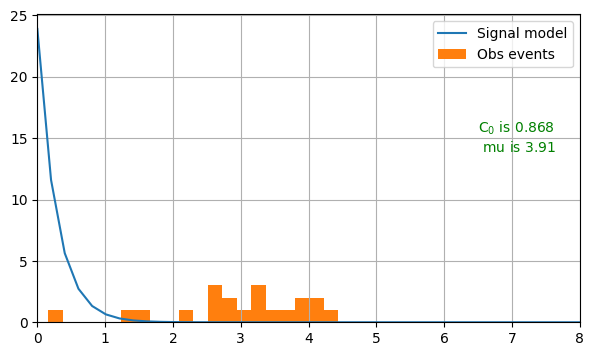

-------------------------------------
For constant c1 23.894736842105264  c2  -3.3421052631578947
C0 is 0.8951295744320393
expected events / area under blue curve:  4.324566049922108


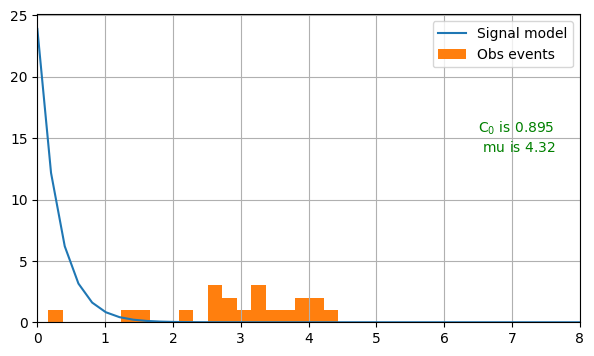

-------------------------------------
For constant c1 23.894736842105264  c2  -3.105263157894737
C0 is 0.9190457566304016
expected events / area under blue curve:  4.8108034949013945


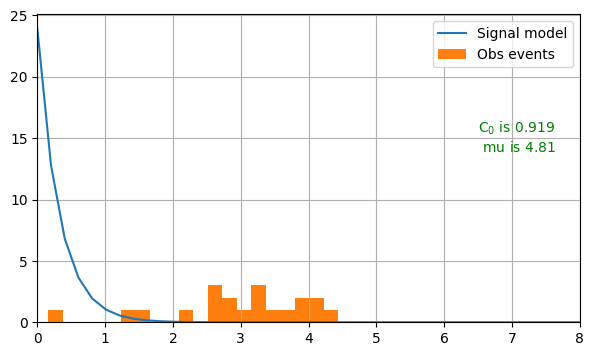

-------------------------------------
For constant c1 23.894736842105264  c2  -2.868421052631579
C0 is 0.939469980882177
expected events / area under blue curve:  5.3849844085012455


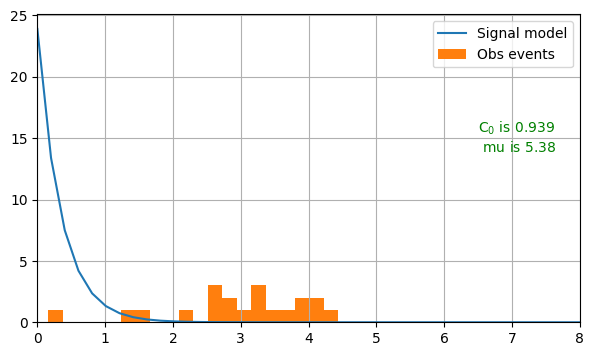

-------------------------------------
For constant c1 25.42105263157895  c2  -3.8157894736842106
C0 is 0.8567351234363848
expected events / area under blue curve:  3.7759212607883637


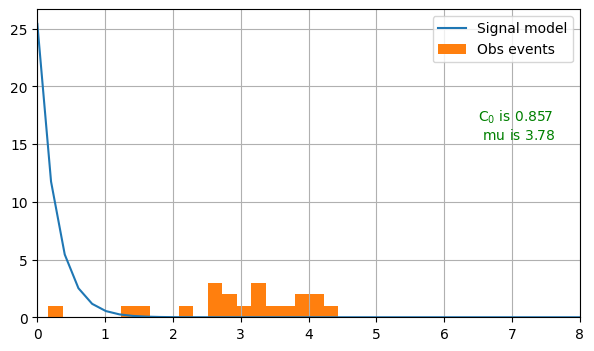

-------------------------------------
For constant c1 25.42105263157895  c2  -3.5789473684210527
C0 is 0.885502761270002
expected events / area under blue curve:  4.158147670764246


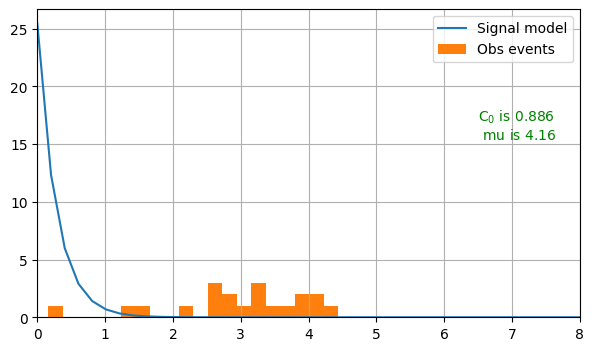

-------------------------------------
For constant c1 25.42105263157895  c2  -3.3421052631578947
C0 is 0.9107307032504931
expected events / area under blue curve:  4.600804850467789


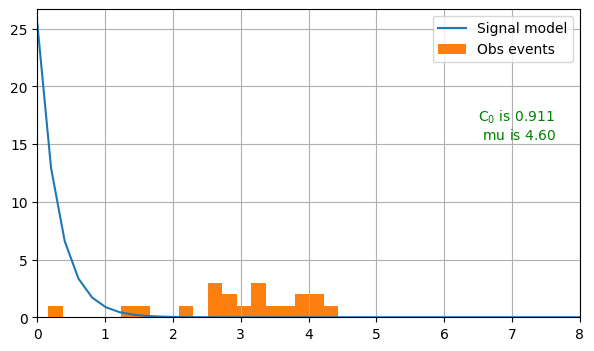

-------------------------------------
For constant c1 25.42105263157895  c2  -3.105263157894737
C0 is 0.9323919459144246
expected events / area under blue curve:  5.118101515500823


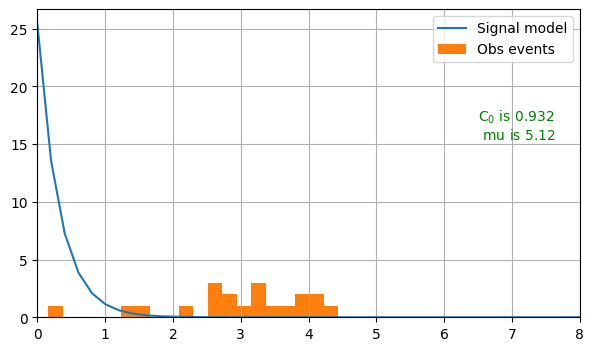

-------------------------------------
For constant c1 26.947368421052634  c2  -3.8157894736842106
C0 is 0.8742187091941893
expected events / area under blue curve:  4.002632889282903


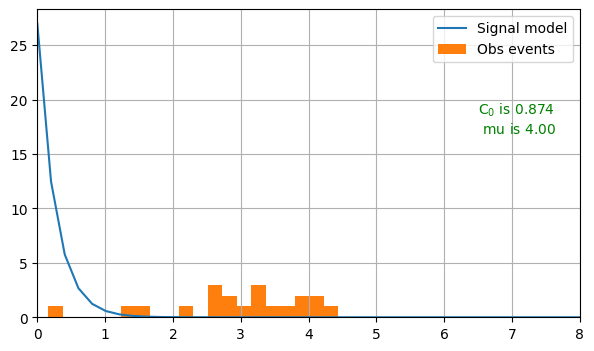

-------------------------------------
For constant c1 26.947368421052634  c2  -3.5789473684210527
C0 is 0.9009834012268145
expected events / area under blue curve:  4.407808711037876


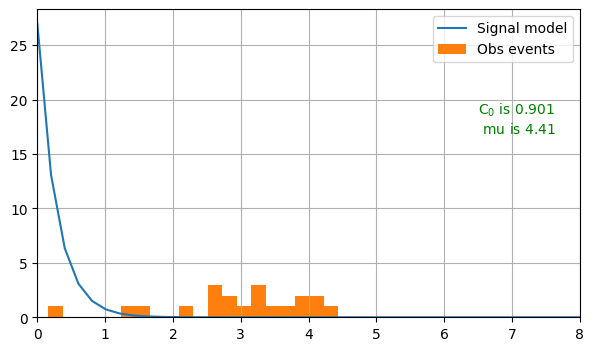

-------------------------------------
For constant c1 26.947368421052634  c2  -3.3421052631578947
C0 is 0.9241005314938744
expected events / area under blue curve:  4.8770436510134765


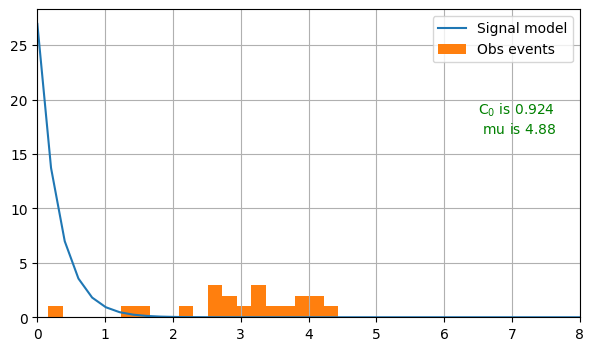

-------------------------------------
For constant c1 26.947368421052634  c2  -3.105263157894737
C0 is 0.9436113633956612
expected events / area under blue curve:  5.425399536100252


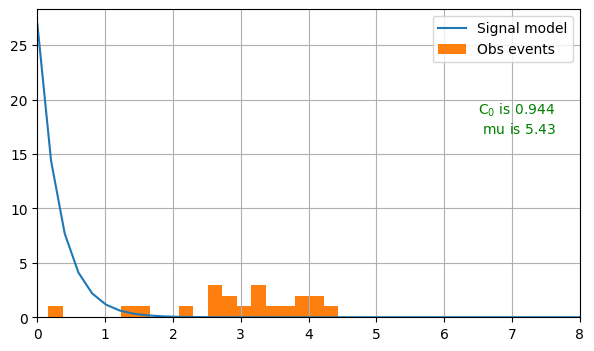

-------------------------------------
For constant c1 28.47368421052632  c2  -4.052631578947368
C0 is 0.8611583505959298
expected events / area under blue curve:  3.8567295065511544


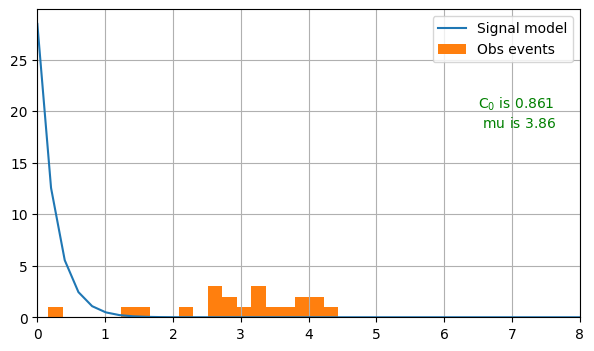

-------------------------------------
For constant c1 28.47368421052632  c2  -3.8157894736842106
C0 is 0.8896707938946535
expected events / area under blue curve:  4.229344517777443


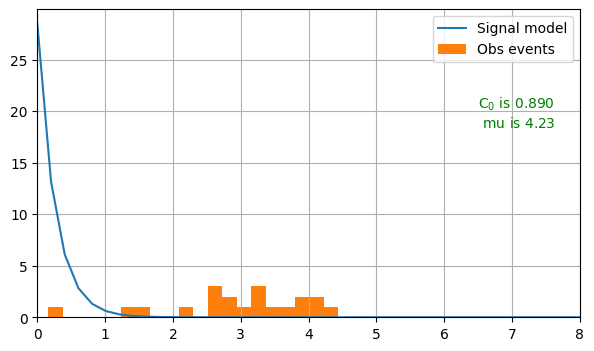

-------------------------------------
For constant c1 28.47368421052632  c2  -3.5789473684210527
C0 is 0.9144571928533971
expected events / area under blue curve:  4.657469751311505


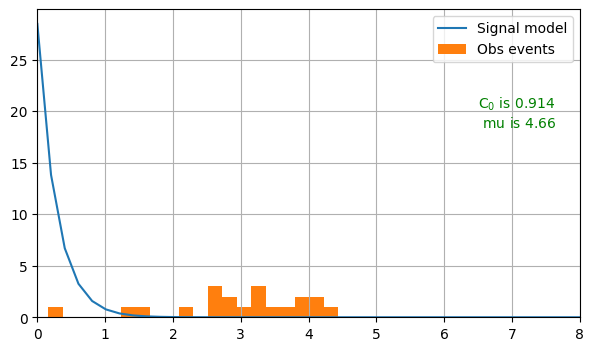

-------------------------------------
For constant c1 28.47368421052632  c2  -3.3421052631578947
C0 is 0.9355390983651153
expected events / area under blue curve:  5.1532824515591615


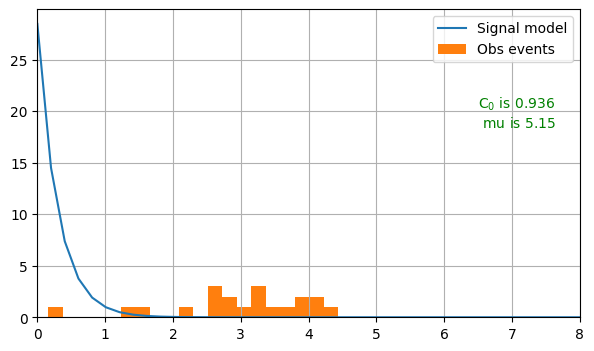

-------------------------------------
For constant c1 30.0  c2  -4.052631578947368
C0 is 0.876648066722956
expected events / area under blue curve:  4.06346731743837


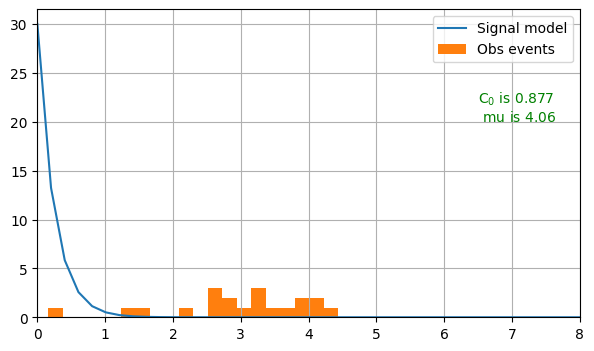

-------------------------------------
For constant c1 30.0  c2  -3.8157894736842106
C0 is 0.9033089113616626
expected events / area under blue curve:  4.456056146271982


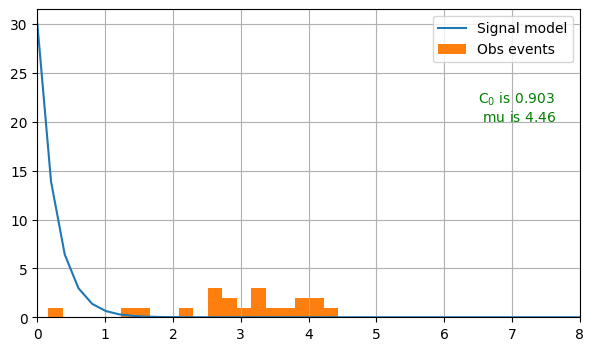

-------------------------------------
For constant c1 30.0  c2  -3.5789473684210527
C0 is 0.9261674270031491
expected events / area under blue curve:  4.907130791585134


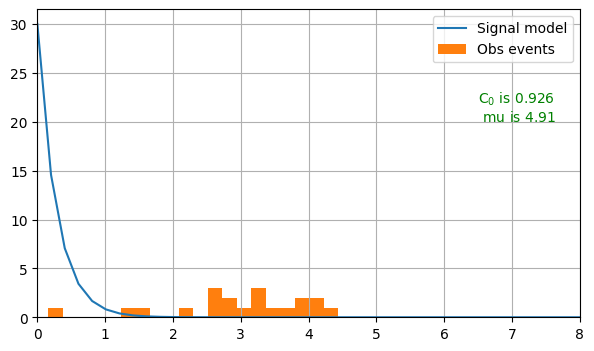

-------------------------------------
For constant c1 30.0  c2  -3.3421052631578947
C0 is 0.9453103252175946
expected events / area under blue curve:  5.429521252104848


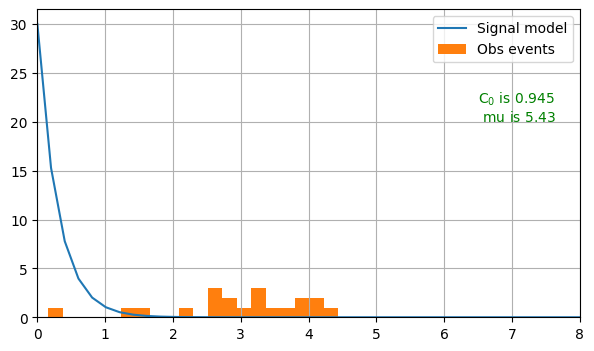

-------------------------------------


In [9]:
c1_all, c2_all, mu_all, c0_all = [], [], [], []
for c1 in np.linspace(1,30,20):
    for c2 in np.linspace(-5,-0.5,20):
        i, maxgaps = 0, []
        for b in range(20):
            if i < 20 and histvalue[i] ==0:
                for n in range(5):
                    if histvalue[i+n] !=0: 
                        gaparea = np.trapz([signal_model(xbins[i], c1, c2 ), signal_model(xbins[i+n], c1, c2 )], [xbins[i], xbins[i+n]])
                        maxgaps.append((i, i+n , gaparea))
                        i+=n; 
                        break
            else:
                i+=1
        maxgaps.append((xbins[-1], 8, np.trapz([signal_model(xbins[-1], c1, c2 ), signal_model(8, c1, c2 )], [xbins[-1], 8])))
        maxarray = np.asarray(maxgaps)
        maxvalues = maxarray[:][np.argmax(maxarray[:,2])]

        mu = 0
        for b in range(20):
            mu+=np.trapz([signal_model(xbins[b], c1, c2 ), signal_model(xbins[b+1],c1, c2 )], [xbins[b], xbins[b+1]])

        c0 = 0
        for k in range(0, int(mu/maxvalues[2])+1):
            c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
        c1_all.append(c1); c2_all.append(c2); mu_all.append(mu); c0_all.append(c0)
        if c0 > 0.85 and c0 < 0.95:
            print('For constant c1', c1, ' c2 ', c2)
            print('C0 is', c0)
            print('expected events / area under blue curve: ', mu)
            plt.figure(figsize=(7,4))
            x = np.linspace(0, 20, 100)
            plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
            plt.hist(di, bins = 20, label = 'Obs events')
            plt.text(6.5,c1-10,'$\mathregular{C_0}$ is %.3f \n $\mathregular{mu}$ is %.2f'%(c0, mu), color ='green')
            plt.xlim(0,8); plt.legend(); plt.grid()
            plt.show()
            print('-------------------------------------')

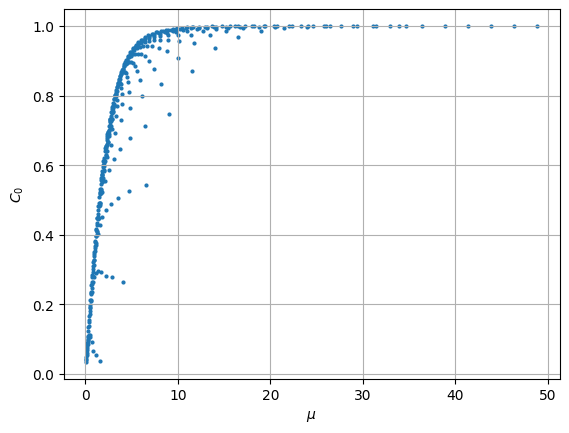

In [10]:
plt.figure(dpi=100)
plt.scatter(mu_all, c0_all, s=4)
plt.xlabel('$\mu$');plt.ylabel('$C_0$');plt.grid(); plt.show()

In [11]:
print('\tmu\t\t\tc1\t\t  c2')
for n in np.where(np.array(mu_all)>20)[0]:
    print(mu_all[n],'\t', c1_all[n],'\t', c2_all[n])

	mu			c1		  c2
21.499527413291897 	 13.210526315789474 	 -0.5
23.983536556660287 	 14.73684210526316 	 -0.5
26.46754570002868 	 16.263157894736842 	 -0.5
20.53689490608162 	 17.789473684210527 	 -0.7368421052631584
28.95155484339706 	 17.789473684210527 	 -0.5
22.298936185005786 	 19.315789473684212 	 -0.7368421052631584
31.435563986765438 	 19.315789473684212 	 -0.5
24.06097746392994 	 20.842105263157897 	 -0.7368421052631584
33.91957313013384 	 20.842105263157897 	 -0.5
25.823018742854103 	 22.36842105263158 	 -0.7368421052631584
36.403582273502224 	 22.36842105263158 	 -0.5
20.69103123217508 	 23.894736842105264 	 -0.9736842105263159
27.58506002177827 	 23.894736842105264 	 -0.7368421052631584
38.887591416870606 	 23.894736842105264 	 -0.5
22.01270503334926 	 25.42105263157895 	 -0.9736842105263159
29.347101300702434 	 25.42105263157895 	 -0.7368421052631584
41.37160056023899 	 25.42105263157895 	 -0.5
23.33437883452345 	 26.947368421052634 	 -0.9736842105263159
31.10914257962659 	 

## Optimum Interval method

#### Method 1

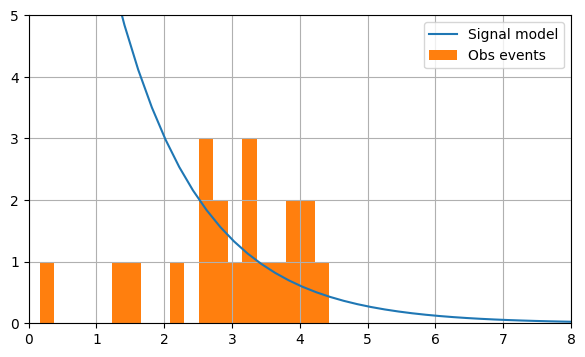

maximum area  4.265754997031758 is between 0.37637962662596974 and 0.5899884391303228


In [12]:
c1, c2 = 15, -0.8
plt.figure(figsize=(7,4))
plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
plt.hist(di, bins = 20, label = 'Obs events')
# plt.scatter(binscenter,value, s=10, color ='black',label ='values')
plt.xlim(0,8); plt.ylim(0,5);plt.legend();plt.grid()
# for i in range(20):
#     plt.text(xbins[i]+0.05 , histvalue[i] + 0.2, str(i), fontsize=10)#, ha='center')
plt.show()

n = 3

maxgaps = []
for b in range(len(histvalue)):
    if histvalue[b] == n:
        startbin = b; endbin = b+1; startx = xbins[b]; endx = xbins[b+1]
#         print('startbin ', startbin,'endbin ', endbin, ', xvalue of start bin ', startx, ', xvalue of end bin ', endx)
        gaparea = np.trapz([signal_model(startx, c1, c2 ), signal_model(endx, c1, c2 )], [startx, endx])
#         print('x_i = ', gaparea)
        maxgaps.append((startx, endx , gaparea))
    for m in np.arange(1,5):
        if b+m < 20:
            if np.sum([histvalue[b+i] for i in range(m+1)]) < n:
                continue
            elif np.sum([histvalue[b+i] for i in range(m+1)]) == n:
                startbin = b; endbin = b+m+1; startx = xbins[b]; endx = xbins[b+m+1]
#                 print('startbin ', startbin,'endbin ', endbin, ', xvalue of start bin ', startx, ', xvalue of end bin ', endx)
                gaparea = np.trapz([signal_model(startx, c1, c2 ), signal_model(endx, c1, c2 )], [startx, endx])
#                 print('x_i = ', gaparea)
                maxgaps.append((startx, endx , gaparea))
                continue
            else:
                break
maxarray = np.asarray(maxgaps)
# print(maxarray)
maxvalues = maxarray[:][np.argmax(maxarray[:,2])]
print('maximum area ', maxvalues[2], 'is between', xbins[int(maxvalues[0])], 'and', xbins[int(maxvalues[1])])

In [13]:
mu = 0
for b in range(20):
    mu+=np.trapz([signal_model(xbins[b], c1, c2 ), signal_model(xbins[b+1],c1, c2 )], [xbins[b], xbins[b+1]])
print('mu is', mu)
print('m is ', mu/maxvalues[2])
print('x is', maxvalues[2])
c0 = 0
for k in range(0, int(mu/maxvalues[2])+1):
    c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
print('C0', c0)

mu is 15.95976010950409
m is  3.7413682034269145
x is 4.265754997031758
C0 0.8286356972122616


#### Method 2 (only works for n = 1) - collapsed

NameError: name 'value' is not defined

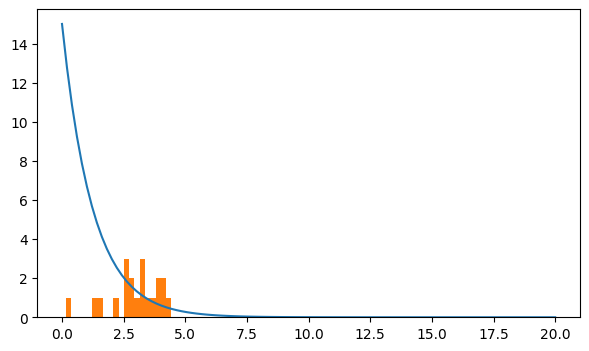

In [14]:
c1, c2 = 15, -0.8
plt.figure(figsize=(7,4))
plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
plt.hist(di, bins = 20, label = 'Obs events')
plt.scatter(binscenter,value, s=10, color ='black',label ='values')
plt.xlim(0,8); plt.ylim(0,5);plt.legend();plt.grid()
for i in range(20):
    plt.text(xbins[i]+0.12 , histvalue[i] + 0.2, str(i), fontsize=10, ha='center')
plt.show()

n = 1

maxgaps = []
for b in range(20):
    if b < len(histvalue) and histvalue[b] ==n:
#         print('#events = '+ str(n)+' at bin#: ', b, ', xvalue[bin]: ',xbins[b], ', histvalue[i]: ',histvalue[b])
        if  b !=0:
            for m in np.arange(1,10):
                if histvalue[b-m] ==0:
                    continue
                else: 
                    startbin = b-m+1
                    startx = xbins[startbin]
                    break
        else: 
            startbin = b
            start = xbins[b]
            
        for m in np.arange(1,10):
            if b+m < len(histvalue) and histvalue[b+m] ==0:
                continue
            else: 
                endbin = b+m
                endx = xbins[endbin]
                break            
        
        gaparea = np.trapz([signal_model(startx, c1, c2 ), signal_model(endx, c1, c2 )], [startx, endx])
#         print('x_i = ', gaparea)
        maxgaps.append((startx, endx , gaparea))
print('maximum area ', maxvalues[2], 'is between', xbins[int(maxvalues[0])], 'and', xbins[int(maxvalues[1])])

In [ ]:
maxarray = np.asarray(maxgaps)
maxvalues = maxarray[:][np.argmax(maxarray[:,2])]
mu = 0
for b in range(20):
    mu+=np.trapz([signal_model(xbins[b], c1, c2 ), signal_model(xbins[b+1],c1, c2 )], [xbins[b], xbins[b+1]])
print('mu is', mu)
print('m is ', mu/maxvalues[2])
print('x is', maxvalues[2])
c0 = 0
for k in range(0, int(mu/maxvalues[2])+1):
    c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
print('C0', c0)

### Finding optimum signal model / sigma and $C_0$ using optimum interval method

In [ ]:
n = 2
c1_all, c2_all, mu_all, c0_all = [], [], [], []
for c1 in np.linspace(5,50,30):
    for c2 in np.linspace(-4,-0.5,30):
        maxgaps = []
        for b in range(20):
            if b < len(histvalue) and histvalue[b] ==n:
        #         print('#events = '+ str(n)+' at bin#: ', b, ', xvalue[bin]: ',xbins[b], ', histvalue[i]: ',histvalue[b])
                if  b !=0:
                    for m in np.arange(1,10):
                        if histvalue[b-m] ==0:
                            continue
                        else: 
                            startbin = b-m+1
                            startx = xbins[startbin]
                            break
                else: 
                    startbin = b
                    start = xbins[b]

                for m in np.arange(1,10):
                    if b+m < len(histvalue) and histvalue[b+m] ==0:
                        continue
                    else: 
                        endbin = b+m
                        endx = xbins[endbin]
                        break            

                gaparea = np.trapz([signal_model(startx, c1, c2 ), signal_model(endx, c1, c2 )], [startx, endx])
                maxgaps.append((startx, endx , gaparea))
                maxarray = np.asarray(maxgaps)
                maxvalues = maxarray[:][np.argmax(maxarray[:,2])]
                mu = 0
                for b in range(20):
                    mu+=np.trapz([signal_model(xbins[b], c1, c2 ), signal_model(xbins[b+1],c1, c2 )], [xbins[b], xbins[b+1]])

                c0 = 0
                for k in range(0, int(mu/maxvalues[2])+1):
                    c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
                c1_all.append(c1); c2_all.append(c2); mu_all.append(mu); c0_all.append(c0)
                    
                if c0 > 0.89 and c0 < 0.91:
                    print('For constant c1', c1, ' c2 ', c2)
                    print('C0 is', c0)
                    print('expected events / area under blue curve: ', mu)
                    plt.figure(figsize=(7,4))
                    x = np.linspace(0, 20, 100)
                    plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
                    plt.hist(di, bins = 20, label = 'Obs events')
                    plt.text(6.5,10,'$\mathregular{C_0}$ is %.3f \n $\mathregular{mu}$ is %.2f'%(c0, mu), color ='green')
                    plt.xlim(0,8); plt.legend(); plt.grid()
                    plt.show()
                    print('-------------------------------------')

In [ ]:
plt.figure(dpi=100)
plt.scatter(mu_all, c0_all, s=4)
plt.xlabel('$\mu$');plt.ylabel('$C_0$');plt.grid(); plt.show()

In [ ]:
print('\tmu\t\t\tc1\t\t  c2')
for n in np.where(np.array(mu_all)>45)[0]:
    print(mu_all[n],'\t', c1_all[n],'\t', c2_all[n])